# Training Logistic Regression Model

In [1]:
import pickle

import numpy as np
import os
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

from data_processing.data import CLASS_NAMES, load_discretized_data

FEATURES = 0
TARGETS = 1

## Setup and load data

In [2]:
data_dir = "./data_processing/voxels/"

# Set random seeds
seed = 71
np.random.seed(seed)

# Load data
train, _ = load_discretized_data(data_dir, prefix='Grid20', binary=True)

#select subset of data
examples_limit = -1
if examples_limit == -1:
    examples_limit = train[TARGETS].shape[0]

Loading discretized data from: ./data_processing/voxels/Grid20voxels.h5


## Build model

Use standard `LogisticRegression` without regularization:

In [3]:
model = LogisticRegression(
        solver='saga', 
        n_jobs=-1, 
        class_weight='None', #'balanced'
        penalty='l2', #regularization (penalization)
        C=1.0e10, # regularization parameter
        max_iter=10000,
        tol=1e-4
        )

Using cross-validation and a grid-search for best regularization with `LogisticRegressionCV`:

In [4]:
model_cv = LogisticRegressionCV(
        solver='saga', 
        n_jobs=-1, 
        class_weight='None', #'balanced'
        penalty='l1', #regularization (penalization)
        Cs=10, #inverse regularization strength (if int, set in a scale)
        cv=5, #cross-validation fold
        max_iter=10000,
        tol=1e-4
        )

## Train the model

In [5]:
%%time
#model.fit(train[FEATURES][:examples_limit],
#          train[TARGETS][:examples_limit])

model_cv.fit(train[FEATURES][:examples_limit],
          train[TARGETS][:examples_limit])


log_dir = "logistic/logs/"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

#model_filename = os.path.join(log_dir, 'logistic_model.pkl')
#pickle.dump(model, open(model_filename, 'wb'))
model_filename = os.path.join(log_dir, 'logistic_cv_model.pkl')
pickle.dump(model_cv, open(model_filename, 'wb'))

CPU times: user 1min 52s, sys: 280 ms, total: 1min 52s
Wall time: 42 s


In [6]:
model_cv.C_

array([21.5443469])

## Evaluate model

As a guideline for how well the model performs it is evaluated on the total training data set below:

In [7]:
import logistic.eval
%load_ext autoreload
%autoreload 1
%aimport logistic.eval

In [8]:
#logistic.eval.eval(model_file='logistic/logs/logistic_model.pkl', data=train, name="LogisticRegression", examples_limit=examples_limit)


Classification Report for: LogisticCVRegression

Accuracy: 0.9974937343358395

              precision    recall  f1-score   support

        beam       1.00      0.99      1.00       793
    reaction       1.00      1.00      1.00       803

    accuracy                           1.00      1596
   macro avg       1.00      1.00      1.00      1596
weighted avg       1.00      1.00      1.00      1596



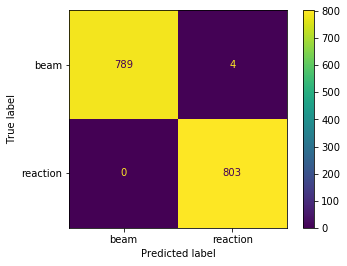

In [9]:
logistic.eval.eval(model_file='logistic/logs/logistic_cv_model.pkl', data=train, name="LogisticCVRegression", examples_limit=examples_limit)